<a href="https://colab.research.google.com/github/0123universe/0123universe/blob/main/Stack%20Overflow%20Annual%20Developer%20Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Visualize most popular programming languages

Here is all the data you need:
"survey_results_public.csv"

## Data loading

### Subtask:
Load the survey data.


**Reasoning**:
Load the survey data into a pandas DataFrame, handling potential encoding issues.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('survey_results_public.csv')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('survey_results_public.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('survey_results_public.csv', encoding='utf-8')
        except Exception as e:
            print(f"Error loading the file: {e}")
            df = pd.DataFrame() # Create an empty DataFrame in case of failure

display(df.head())

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Data exploration

### Subtask:
Explore the loaded dataframe to identify the relevant column for programming languages and understand the data distribution.


**Reasoning**:
Identify the relevant columns for programming languages, check their data types, unique values, and missing values. This addresses all the steps in the current subtask.



In [2]:
# Identify columns related to programming languages
language_columns = [col for col in df.columns if 'Language' in col]
print("Columns related to programming languages:", language_columns)

# Data types of identified columns
print("\nData types of language columns:")
for col in language_columns:
    print(f"{col}: {df[col].dtype}")

# Analyze unique values
print("\nUnique values (or a sample) in language columns:")
for col in language_columns:
    unique_values = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_values)}")
    if len(unique_values) < 10:  # Print all unique values if less than 10
        print(unique_values)
    else:
        print(unique_values[:10])  # Print first 10 unique values otherwise


# Check for missing values and unexpected values in the most promising column
# 'LanguageHaveWorkedWith' seems to be the most promising column
print("\nMissing values and unexpected values in 'LanguageHaveWorkedWith':")
missing_count = df['LanguageHaveWorkedWith'].isnull().sum()
print("Number of missing values:", missing_count)

# Example of unexpected values (if any), here we check for empty strings or non-string values
unexpected_values = []
for value in df['LanguageHaveWorkedWith']:
    if isinstance(value, str) == False:
        unexpected_values.append(value)

print("Number of unexpected values:", len(unexpected_values))
if len(unexpected_values) > 0:
    print("Examples of unexpected values:", unexpected_values[:5])

Columns related to programming languages: ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired']

Data types of language columns:
LanguageHaveWorkedWith: object
LanguageWantToWorkWith: object
LanguageAdmired: object

Unique values (or a sample) in language columns:

Column: LanguageHaveWorkedWith
Number of unique values: 23865
[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#'
 'C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;Python;SQL;TypeScript'
 'C++;HTML/CSS;JavaScript;Lua;Python;Rust'
 'Bash/Shell (all shells);HTML/CSS;Java;JavaScript;Python;Rust;Swift;TypeScript'
 'R' 'HTML/CSS;JavaScript;TypeScript' 'Lua' 'JavaScript;Python;Ruby']

Column: LanguageWantToWorkWith
Number of unique values: 22770
[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript'
 'C#' 'HTML/CSS;Java;JavaScript;PowerShell;Python;SQL;TypeScript'
 'C++;HTML/CSS;JavaScript;Lua;Python'
 'Bash/Shell (all shells);HTML/CSS;Java;JavaScript;Py

## Data wrangling

### Subtask:
Clean and prepare the 'LanguageHaveWorkedWith' column for analysis.


**Reasoning**:
Clean the 'LanguageHaveWorkedWith' column by handling missing values and splitting the comma-separated languages into individual entries. Convert language names to lowercase for consistency.



In [3]:
import pandas as pd

# Handle missing values in 'LanguageHaveWorkedWith'
# Replace NaN values with 'Unknown' to avoid data loss
df['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)

# Split the comma-separated languages and create a new DataFrame
languages_df = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
languages_df = languages_df.reset_index(level=1, drop=True).rename('Language')
languages_df = languages_df.str.lower()
languages_df = languages_df.reset_index()

display(languages_df.head())

<ipython-input-3-c965759f030a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


,index,Language
0,0,unknown
1,1,bash/shell (all shells)
2,1,go
3,1,html/css
4,1,java


**Reasoning**:
The previous code block had a warning about chained assignment.  I will rewrite the code to correct this, and then proceed with the task.



In [4]:
# Handle missing values in 'LanguageHaveWorkedWith'
# Replace NaN values with 'Unknown' to avoid data loss
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('Unknown')

# Split the comma-separated languages and create a new DataFrame
languages_df = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
languages_df = languages_df.reset_index(level=1, drop=True).rename('Language')
languages_df = languages_df.str.lower()
languages_df = languages_df.reset_index()

display(languages_df.head())

,index,Language
0,0,unknown
1,1,bash/shell (all shells)
2,1,go
3,1,html/css
4,1,java


## Data analysis

### Subtask:
Analyze the cleaned language data to determine the top 10 most popular programming languages.


**Reasoning**:
Group the `languages_df` DataFrame by the 'Language' column, count occurrences, sort in descending order, select the top 10, and store the result in `top_10_languages`.



In [5]:
language_counts = languages_df.groupby('Language')['Language'].count().sort_values(ascending=False)
top_10_languages = pd.DataFrame({'Language': language_counts.index[:10], 'Count': language_counts.values[:10]})
display(top_10_languages)

,Language,Count
0,javascript,37492
1,html/css,31816
2,python,30719
3,sql,30682
4,typescript,23150
5,bash/shell (all shells),20412
6,java,18239
7,c#,16318
8,c++,13827
9,c,12184


## Data visualization

### Subtask:
Create a bar chart visualizing the popularity of the top 10 programming languages.


**Reasoning**:
Create the bar chart visualization using the top_10_languages dataframe.



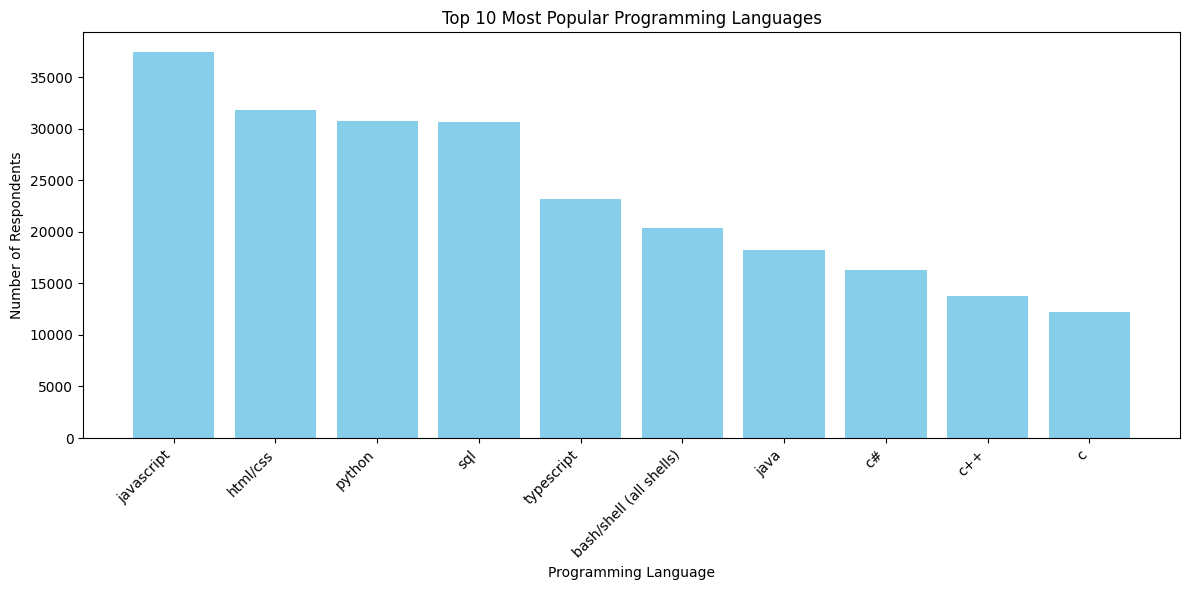

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10_languages['Language'], top_10_languages['Count'], color='skyblue')
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.title("Top 10 Most Popular Programming Languages")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('programming_language_popularity.png')
plt.show()

## Summary:

### 1. Q&A
The task was to visualize the most popular programming languages from the survey data.  The analysis identified the top 10 most popular languages, which are: Javascript, HTML/CSS, Python, SQL, Typescript, Bash/Shell, Java, C#, C++, and C.

### 2. Data Analysis Key Findings
* **Top 10 Languages**: The analysis revealed the top 10 most popular programming languages based on respondent counts:
    * JavaScript: 37,492
    * HTML/CSS: 31,816
    * Python: 30,719
    * SQL: 30,682
    * TypeScript: 23,150
    * Bash/Shell (all shells): 20,412
    * Java: 18,239
    * C#: 16,318
    * C++: 13,827
    * C: 12,184
* **Significant Missing Data**: The `LanguageHaveWorkedWith` column, crucial for the analysis, had 5,692 missing values.  These were filled with "Unknown" to avoid data loss.

### 3. Insights or Next Steps
* **Focus on Top Languages**:  Further analysis could delve deeper into the characteristics of developers who use the top 10 languages (e.g., experience level, demographics, preferred tools).
* **Investigate Missing Data**: Explore the reasons behind the missing data in the `LanguageHaveWorkedWith` column.  Understanding the nature of these missing values could lead to more accurate insights.
